In [1]:
import pandas as pd
import math
from matplotlib import pyplot as plt
%matplotlib inline
import csv

In [2]:
df = pd.read_csv('/Users/joshuaguevara/Desktop/CovidProject/CovidDataFile.csv')
df

,Covid Data
0,"Sep 15, 2020"
1,"6,557,762"
2,"Sep 14, 2020"
3,"6,522,317"
4,"Sep 13, 2020"
...,...
467,0
468,"Jan 25, 2020"
469,0
470,"Jan 24, 2020"


In [3]:
dates = []#Number of days
casesAsStrings = []
cases = []#Raw cases without extra info
for i in range(len(df)-1,-1,-1):
    if(i%2 != 0):#Cases on odd rows
        casesAsStrings.append(df.loc[i])

for i in range(0,len(casesAsStrings)):#Making new lists with refined data
    cases.append(int(casesAsStrings[i][0].replace(',','')))
    dates.append(i)
   

In [4]:
#Least Squares Regression Line

#Calculate X value mean 
xSum = 0
for i in range(0,len(dates)):
    xSum += i
xMean = xSum/len(dates)#Average of number of days

ySum = 0
#Calculate Y value mean
for j in range(0,len(cases)):
    ySum += cases[j]

yMean = ySum/len(cases)

yMean = int(yMean)#Average of number of cases

#Calculate regX, x values minus x mean
regX = [] #List containing distance of x values from x mean
for i in range(0,len(dates)):
    regX.append(dates[i]-xMean)
    
regY = []
#Calculate regY, y values minus y mean
for i in range(0,len(cases)):
    regY.append(cases[i]-yMean)

#Calculate regX squared 
squaredRegX = []
for i in range(0,len(regX)):
    squaredRegX.append(regX[i] * regX[i])

#Calculate regX * regY list
regressionProducts = [] #(x-xMean)(y-yMean)
for i in range(0,len(regX)): 
    regressionProducts.append(regX[i]*regY[i])

#Complete regression line equation y = b0 + b1(x)
#B1 = sigma(regressionProducts)/sigma(squaredRegX)

#Compute sigma(regressionProducts)
sigmaRegProducts = 0
for i in range(0,len(regressionProducts)):
    sigmaRegProducts += regressionProducts[i]

#Compute sigma squaredRegX
sigmaRegX = 0
for i in range(0,len(squaredRegX)):
    sigmaRegX += squaredRegX[i]
    
#b1 = slope
slope = sigmaRegProducts/sigmaRegX

#b0 = y intercept = meanY - b0(meanX)

yIntercept = yMean - (slope * xMean)
#Y value = yIntercept + slope(x)

dependentRegValues = []
for i in range(0,len(dates)):
    dependentRegValues.append(yIntercept + (slope * dates[i]))
    

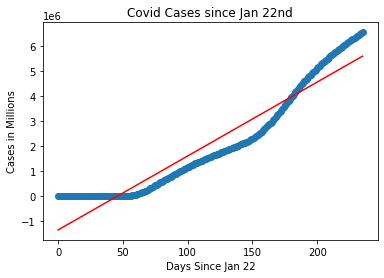

In [5]:
#Graph current data along with regression line
plt.scatter(dates,cases)
plt.plot(dates,dependentRegValues, color = 'red')
plt.title("Covid Cases since Jan 22nd")
plt.ylabel('Cases in Millions')
plt.xlabel('Days Since Jan 22')
plt.show()
